In [47]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from statistics import mean
import matplotlib.pyplot as plt
import aux_Func as aux_Func
from sklearn.neighbors import KNeighborsClassifier as KNN

In [48]:
# MACROS
NDATASETS = 5
N_TRAIN_SAMPLES = 15
NLAMDAS = 20

In [49]:
DataMatrix = [ []*2 for i in range(NDATASETS)]
matrixDatasetTraintest =  [ []*4 for i in range(NDATASETS)]
matrixXYtrainparts =  [[[]*2 for j in range(N_TRAIN_SAMPLES)] for i in range(NDATASETS)]

In [50]:
DataMatrix = aux_Func.createDatasetClassification_make_moons(NDATASETS, nSamples=10000, shuffle = True, noise = 0.2, random_state = None)

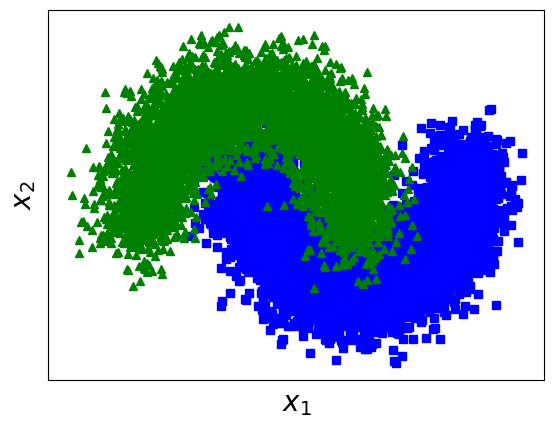

In [51]:
plt.plot(DataMatrix[0][0][:, 0][DataMatrix[0][1]==1], DataMatrix[0][0][:, 1][DataMatrix[0][1]==1], "bs")
plt.plot(DataMatrix[0][0][:, 0][DataMatrix[0][1]==0], DataMatrix[0][0][:, 1][DataMatrix[0][1]==0], "g^")

# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Simplifying the plot by removing the axis scales.
plt.xticks([])
plt.yticks([])

# Displaying the plot.
plt.show()

In [52]:
for i in range(NDATASETS):
    X_train, X_test, y_train, y_test = train_test_split(DataMatrix[i][0], DataMatrix[i][1], random_state=4, test_size=0.3439, shuffle=True)
    matrixDatasetTraintest[i].extend((X_train, X_test, y_train, y_test))

In [53]:
listTrainSamples = np.logspace(4.5, 7, num=N_TRAIN_SAMPLES, base=3)
listTrainSamples = [round(item, 0) for item in listTrainSamples]
listTrainSamples

[140.0,
 171.0,
 208.0,
 253.0,
 308.0,
 374.0,
 455.0,
 554.0,
 674.0,
 820.0,
 998.0,
 1214.0,
 1477.0,
 1797.0,
 2187.0]

In [54]:
for i in range(NDATASETS):
    for idx, el in enumerate(listTrainSamples):
        XtrainDivided = matrixDatasetTraintest[i][0][0:int(el)]
        
        YtrainDivided = matrixDatasetTraintest[i][2][0:int(el)]
        matrixXYtrainparts[i][idx].extend((XtrainDivided, YtrainDivided))

In [55]:
k_aux_list = [1,3,5,7,9,12,15,19,25,35,40,45,60,75,80,90,100,105,115,130]

In [56]:
matrixKNNResults = np.zeros([NDATASETS,N_TRAIN_SAMPLES,NLAMDAS,2])

k_list = [[]*NLAMDAS for i in range(N_TRAIN_SAMPLES)]

knn_classifiers = [[]*NLAMDAS for i in range(N_TRAIN_SAMPLES)]

# Creamos los diferentes knn regressors
for idx, train_example in enumerate(listTrainSamples):
    for jdx, k_mult in enumerate(k_aux_list):
        k = k_mult
        print(len(matrixDatasetTraintest[0][1]))
        if k >= len(matrixDatasetTraintest[0][1]):
            print(k)
            k= len(matrixDatasetTraintest[0][1]) - 1
        
        k_list[idx].append(k)
        knn_classifiers[idx].append(KNN(n_neighbors=k))


for i in range(NDATASETS):
    for id_trainSample in range(len(listTrainSamples)):
        for jdx, knn_classifer in enumerate(knn_classifiers[id_trainSample]):
            
            knn_classifer.fit(matrixXYtrainparts[i][id_trainSample][0], matrixXYtrainparts[i][id_trainSample][1])
            y_pred = knn_classifer.predict(matrixDatasetTraintest[i][1])
            
            matrixKNNResults[i][id_trainSample][jdx][0] = knn_classifer.n_neighbors
            matrixKNNResults[i][id_trainSample][jdx][1] = accuracy_score(matrixDatasetTraintest[i][3], y_pred)

3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439
3439


KeyboardInterrupt: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


3
maxValue =  0.9610351846466996
3
maxValue =  0.9639430066879907
4
maxValue =  0.9651061355045071
5
maxValue =  0.9677231753416691
5
maxValue =  0.96743239313754
5
maxValue =  0.9668508287292817
6
maxValue =  0.9683047397499273
6
maxValue =  0.9677231753416691
6
maxValue =  0.9677231753416691
4
maxValue =  0.9685955219540564
4
maxValue =  0.9683047397499273
7
maxValue =  0.9685955219540564
6
maxValue =  0.96743239313754
8
maxValue =  0.9677231753416691
15
maxValue =  0.9680139575457982


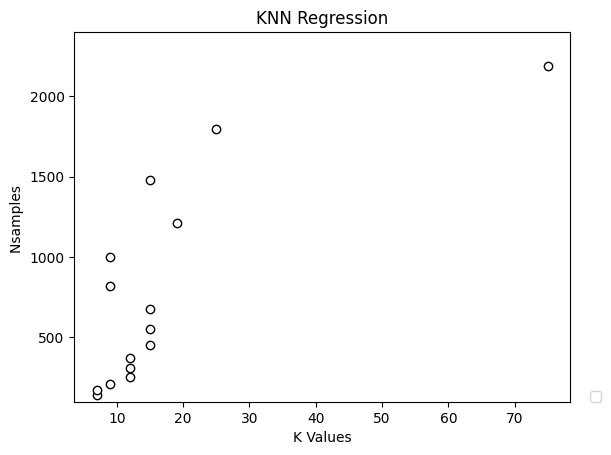

In [ ]:
#r2_scores = [ []*25 for i in range(NSAMPLES)]
r2_scores = np.zeros([N_TRAIN_SAMPLES, NLAMDAS])

#MatrixKNNResultsInvertida =  [[[]*2 for j in range(NSAMPLES)] for i in range(25)]
MatrixKNNResultsInvertida = np.zeros([NLAMDAS, N_TRAIN_SAMPLES, 2])

for i_sample in range(N_TRAIN_SAMPLES):
    for i_kvalue in range(NLAMDAS):
        for i_dataset in range(NDATASETS):
            listR2ScoreDataset = []
            listR2ScoreDataset.append(matrixKNNResults[i_dataset][i_sample][i_kvalue][1])
            MatrixKNNResultsInvertida[i_kvalue][i_sample][0] = matrixKNNResults[i_dataset][i_sample][i_kvalue][0]
            MatrixKNNResultsInvertida[i_kvalue][i_sample][1] = mean(listR2ScoreDataset)



for idx_sample in range(N_TRAIN_SAMPLES):
    for idx_kvalue in range(NLAMDAS):
        r2_scores[idx_sample][idx_kvalue] = MatrixKNNResultsInvertida[idx_kvalue][idx_sample][1]

#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,N_TRAIN_SAMPLES)))
f, ax = plt.subplots(1)

cm = plt.get_cmap('gist_rainbow')
ax.set_prop_cycle('color', [cm(1.*i/15) for i in range(N_TRAIN_SAMPLES)])

plt.title("KNN Regression")
plt.xlabel("K Values")
plt.ylabel("Nsamples ")
plt.ylim([100,2400])
for i_sample in range(N_TRAIN_SAMPLES):
    maxValue = np.amax(r2_scores[i_sample])
    i_maxValue = np.where(r2_scores[i_sample] == maxValue)[0][0]
    print(i_maxValue)
    print("maxValue = ", maxValue)
    #print("k_list[i_kvalue][i_maxValue][0] = ", k_list[i_kvalue][i_maxValue])
    plt.plot(k_list[i_sample][i_maxValue], listTrainSamples[i_sample], marker = "o", markeredgecolor = "black", markerfacecolor="white")
plt.legend(loc=(1.04, 0))
plt.show(f)